# PRML Assignment 4: PCA and LDA on Iris Dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# ------------------------------
# PCA Analysis
# ------------------------------
print("Performing PCA...")

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("Covariance matrix:\n", cov_matrix)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:\n", eigenvalues)
print("Explained Variance Ratio (Top 2):", eigenvalues[:2] / np.sum(eigenvalues))

# Project onto top 2 principal components
X_pca_manual = X_scaled @ eigenvectors[:, :2]

Performing PCA...
Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Explained Variance Ratio (Top 2): [0.72962445 0.22850762]


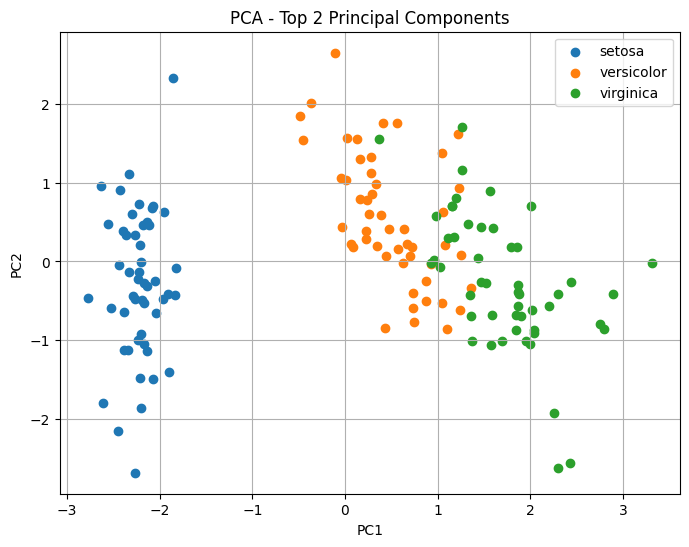

In [4]:
# Visualize PCA result
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca_manual[y == i, 0], X_pca_manual[y == i, 1], label=target_name)
plt.title("PCA - Top 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# ------------------------------
# LDA Analysis
# ------------------------------
print("Performing LDA...")

# Use sklearn's LDA (1 or 2 components depending on class)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


Performing LDA...


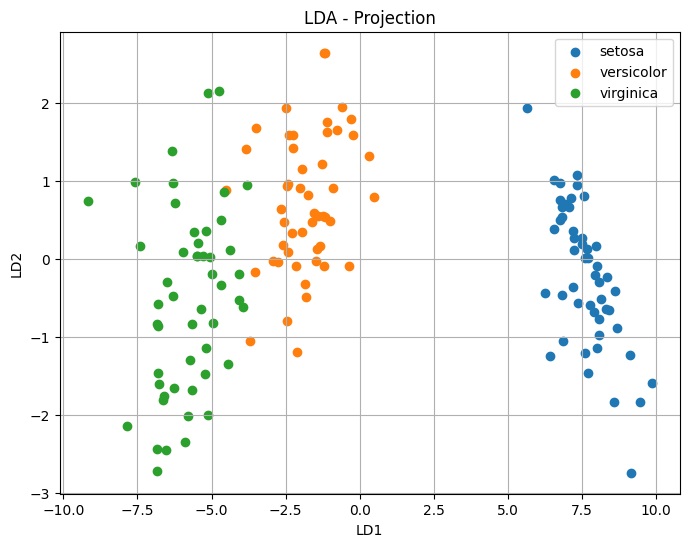

In [6]:
# Visualize LDA result
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.title("LDA - Projection")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()